# 군집분석

한 기업이 해킹을 당해서 우리에게 도움을 요청했습니다! 다행스럽게도 그 기업의 포렌식 기술자들은 session time, location, wpm typing speed 등과 같은 해킹에 대한 귀중한 정보를 수집했습니다. 담당 포렌식 기술자와의 회의에서 듣기로는 해커들이 서버에 접속하는데에 사용한 각 세션의 메타 데이터들을 수집한 것이라고 합니다.

다음은 수집된 데이터입니다

- Session_Connection_Time : 세션이 지속된 시간(분)입니다.
- Bytes Transferred : 세션 중에 전송된 데이터 용량(MB)입니다.
- Kali_Trace_Used : 해커의 Kali Linux 사용 여부입니다.
- Servers_Corrupted : 공격으로 손상된 서버 수 입니다.
- Pages_Corrupted : 무단으로 접근한 페이지 수 입니다.
- Location : 공격이 시작된 위치입니다.(해커들이 VPN을 사용했기 때문에 아마 쓸모가 없을 것 같습니다.)
- WPM_Typing_Speed : 세션 로그를 기준으로 예상한 타이핑 속도입니다.

이 회사에서는 3명의 해커를 의심 중입니다. 2명의 해커는 어느정도 확신하고 있지만 세 번째 해커가 해킹에 연루되었는지 아직 확실하지 않습니다. 우리에게 의뢰한 부분은 이 부분입니다. 즉, 이번 해킹 사건에서 2명이 공격을 한 것인지 3명이 공격을 한 것인지 분석해달라고 합니다. 확실하지는 않지만 클러스터링으로 알아 볼 수 있을 것 같습니다.

마지막으로 한가지 알려드릴 중요한 사실은, 각 해커들의 공격횟수는 거의 동일합니다. 예를 들어, 총 공격 횟수가 100번 이었다면, 50건씩 2명이 공격을 했거나 3명이 약 33건씩 공격을 했다는 말입니다. 데이터는 hack_data.csv 파일로 전달해 드리겠습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### 데이터 파악

In [2]:
df = pd.read_csv("./hack_data.csv")
df.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed
0,8.0,391.09,1,2.96,7.0,Slovenia,72.37
1,20.0,720.99,0,3.04,9.0,British Virgin Islands,69.08
2,31.0,356.32,1,3.71,8.0,Tokelau,70.58
3,2.0,228.08,1,2.48,8.0,Bolivia,70.80
4,20.0,408.50,0,3.57,8.0,Iraq,71.28


In [3]:
df.shape

(334, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Session_Connection_Time  334 non-null    float64
 1   Bytes Transferred        334 non-null    float64
 2   Kali_Trace_Used          334 non-null    int64  
 3   Servers_Corrupted        334 non-null    float64
 4   Pages_Corrupted          334 non-null    float64
 5   Location                 334 non-null    object 
 6   WPM_Typing_Speed         334 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 18.4+ KB


In [5]:
df.nunique()

Session_Connection_Time     56
Bytes Transferred          334
Kali_Trace_Used              2
Servers_Corrupted          272
Pages_Corrupted              8
Location                   181
WPM_Typing_Speed           287
dtype: int64

In [6]:
df1 = df[["Session_Connection_Time", "Bytes Transferred", "Kali_Trace_Used", "Servers_Corrupted", "Pages_Corrupted", "WPM_Typing_Speed"]]
df1.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed
0,8.0,391.09,1,2.96,7.0,72.37
1,20.0,720.99,0,3.04,9.0,69.08
2,31.0,356.32,1,3.71,8.0,70.58
3,2.0,228.08,1,2.48,8.0,70.80
4,20.0,408.50,0,3.57,8.0,71.28


### 시각화

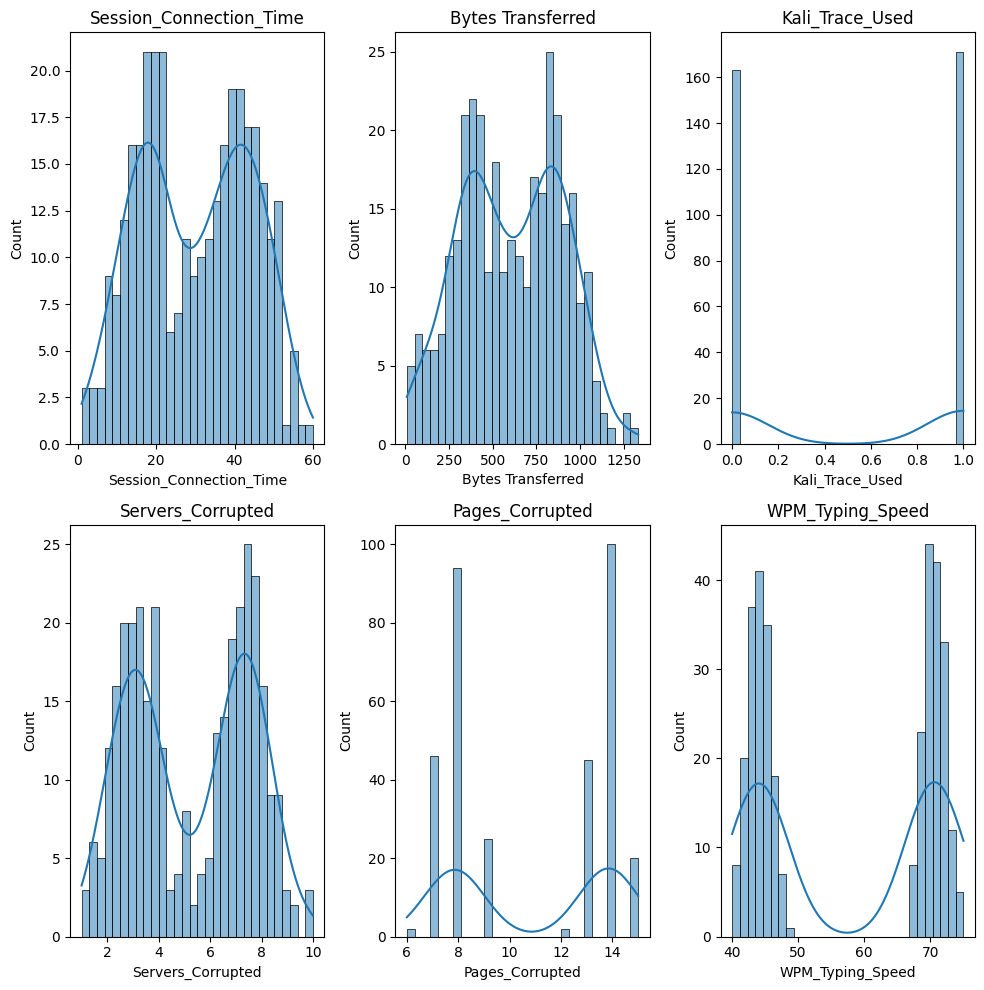

In [7]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(df1.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df1[col], kde= True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

<Axes: >

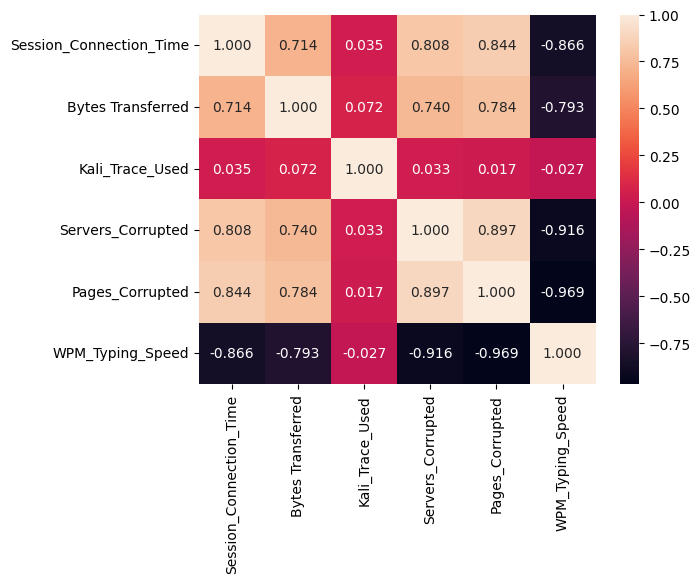

In [8]:
df1_heat = df1.corr()
sns.heatmap(df1_heat, cbar= True, annot= True, fmt= ".3f", yticklabels= df1_heat, xticklabels= df1_heat)

### Elbow Method

In [9]:
inertia = []

for k in range(1, 11):
    km =KMeans(n_clusters= k, random_state= 22)
    km.fit(df1)
    inertia.append(km.inertia_)

c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

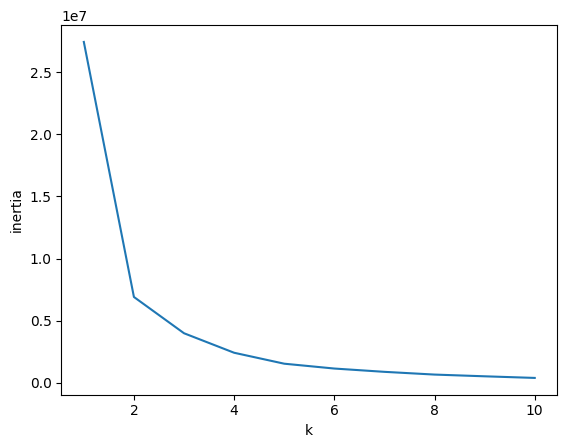

In [10]:
plt.plot(range(1, 11), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

## 1. 해커가 2명일 때

In [11]:
df1.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed
0,8.0,391.09,1,2.96,7.0,72.37
1,20.0,720.99,0,3.04,9.0,69.08
2,31.0,356.32,1,3.71,8.0,70.58
3,2.0,228.08,1,2.48,8.0,70.80
4,20.0,408.50,0,3.57,8.0,71.28


In [12]:
kmeans = KMeans(n_clusters= 2, random_state= 22)
clusters = kmeans.fit_predict(df1)

c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
df1["cluster_2"] = clusters
df1["cluster_2"].value_counts().sort_index()

cluster_2
0    171
1    163
Name: count, dtype: int64

In [14]:
kmeans = KMeans(n_clusters= 3, random_state= 22)
clusters = kmeans.fit_predict(df1)

c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df1["cluster_3"] = clusters
df1["cluster_3"].value_counts().sort_index()

cluster_3
0     95
1    114
2    125
Name: count, dtype: int64

In [16]:
df1.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed,cluster_2,cluster_3
0,8.0,391.09,1,2.96,7.0,72.37,0,1
1,20.0,720.99,0,3.04,9.0,69.08,1,0
2,31.0,356.32,1,3.71,8.0,70.58,0,1
3,2.0,228.08,1,2.48,8.0,70.80,0,1
4,20.0,408.50,0,3.57,8.0,71.28,0,1
